In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl 
import math
import plotly.express as px
from numpy import nan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
data=pd.ExcelFile("C:/Users/pc/Downloads/CHURNDATA.xlsx")


In [3]:
churn=pd.read_excel(data,'CHURN')

In [4]:
data

In [5]:
churn

,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,XXXXXX,Feb 13 1970 12:00AM,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,XXXXXX,Sep 20 1973 12:00AM,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,XXXXXX,Jul 18 1966 12:00AM,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,XXXXXX,Jan 9 2004 12:00AM,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,XXXXXX,Mar 7 1971 12:00AM,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,XXXXXX,Sep 10 1951 12:00AM,68,4500.00,MALE,SINGLE,2005-07-25,14,13,12,...,0.00,0.00,5645.60,26,0.00,0,26,2223,LOW,CHURN
1245,XXXXXX,Mar 23 1984 12:00AM,35,3500000.00,MALE,SINGLE,2005-07-27,14,55,35,...,119137.62,440891.65,385735.90,127,674630.41,22,149,2222,MIDLE,ACTIVE
1246,XXXXXX,Feb 4 1985 12:00AM,34,1000.00,MALE,SINGLE,2005-07-25,14,415,368,...,733658.65,971555.27,2473621.68,1207,2641348.01,217,1424,2232,MIDLE,ACTIVE
1247,XXXXXX,Feb 3 1950 12:00AM,69,2000000.00,MALE,SINGLE,2005-07-26,14,147,202,...,532708.75,400814.60,1371852.22,583,1310768.35,48,631,2222,MIDLE,ACTIVE


In [6]:
churn.head(10)

,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,XXXXXX,Feb 13 1970 12:00AM,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,XXXXXX,Sep 20 1973 12:00AM,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,XXXXXX,Jul 18 1966 12:00AM,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,XXXXXX,Jan 9 2004 12:00AM,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,XXXXXX,Mar 7 1971 12:00AM,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE
5,XXXXXX,Dec 21 1982 12:00AM,37,2556.00,MALE,SINGLE,2005-05-23,14,113,138,...,539970.27,739082.52,1883962.89,490,2037638.47,95,585,2235,MIDLE,ACTIVE
6,XXXXXX,Apr 8 2003 12:00AM,16,200000.00,FEMALE,SINGLE,2005-05-24,14,3,0,...,0.00,0.00,8693.60,3,0.00,0,3,2223,LOW,CHURN
7,XXXXXX,Aug 28 1980 12:00AM,39,10000000.00,MALE,MARRIED,2005-05-24,14,128,150,...,492067.05,630958.47,1477803.14,422,1554678.53,32,454,2223,LOW,ACTIVE
8,XXXXXX,Apr 6 1973 12:00AM,46,15000000.00,MALE,MARRIED,2005-05-24,14,214,362,...,1296021.03,1043510.33,3240369.08,877,3160483.36,49,926,2212,EXECUTIVE,ACTIVE
9,XXXXXX,Sep 2 1960 12:00AM,59,1500000.00,FEMALE,MARRIED,2005-05-24,14,11,40,...,130000.00,398046.93,535684.68,130,528046.93,12,142,2223,LOW,ACTIVE


In [7]:
churn.tail(11)

,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
1238,XXXXXX,Mar 13 2001 12:00AM,18,1500000.0,MALE,SINGLE,2005-06-09,14,28,31,...,10950.00,8170.00,88585.60,89,39850.00,36,125,2223,LOW,ACTIVE
1239,XXXXXX,May 21 1963 12:00AM,56,5000000.0,MALE,MARRIED,2005-07-21,14,6,6,...,0.00,0.00,2749.54,18,0.00,0,18,2223,LOW,CHURN
1240,XXXXXX,Jan 24 1985 12:00AM,34,500000.0,MALE,MARRIED,2005-07-22,14,6,13,...,1253300.00,146735.00,975784.95,40,1775035.00,8,48,2222,MIDLE,ACTIVE
1241,XXXXXX,Jul 30 1974 12:00AM,45,9000.0,FEMALE,DIVORCE,2005-07-22,14,58,55,...,1762123.05,4099024.64,5538341.36,197,9741412.20,51,248,2230,PLATINUM,ACTIVE
1242,XXXXXX,Jan 15 1981 12:00AM,38,4600000.0,FEMALE,SINGLE,2005-07-22,14,152,160,...,944760.79,1169392.40,3392328.24,496,3359477.71,89,585,2222,MIDLE,ACTIVE
1243,XXXXXX,Aug 24 1981 12:00AM,38,1500000.0,FEMALE,SINGLE,2005-07-22,14,125,106,...,450054.00,450000.00,2034894.21,295,1850162.00,8,303,2222,MIDLE,ACTIVE
1244,XXXXXX,Sep 10 1951 12:00AM,68,4500.0,MALE,SINGLE,2005-07-25,14,13,12,...,0.00,0.00,5645.60,26,0.00,0,26,2223,LOW,CHURN
1245,XXXXXX,Mar 23 1984 12:00AM,35,3500000.0,MALE,SINGLE,2005-07-27,14,55,35,...,119137.62,440891.65,385735.90,127,674630.41,22,149,2222,MIDLE,ACTIVE
1246,XXXXXX,Feb 4 1985 12:00AM,34,1000.0,MALE,SINGLE,2005-07-25,14,415,368,...,733658.65,971555.27,2473621.68,1207,2641348.01,217,1424,2232,MIDLE,ACTIVE
1247,XXXXXX,Feb 3 1950 12:00AM,69,2000000.0,MALE,SINGLE,2005-07-26,14,147,202,...,532708.75,400814.60,1371852.22,583,1310768.35,48,631,2222,MIDLE,ACTIVE


In [8]:
churn.shape

(1249, 28)

In [9]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   CIF                                 1249 non-null   object        
 1   CUS_DOB                             1249 non-null   object        
 2   AGE                                 1249 non-null   int64         
 3   CUS_Month_Income                    1238 non-null   float64       
 4   CUS_Gender                          1247 non-null   object        
 5   CUS_Marital_Status                  1249 non-null   object        
 6   CUS_Customer_Since                  1249 non-null   datetime64[ns]
 7   YEARS_WITH_US                       1249 non-null   int64         
 8   # total debit transactions for S1   1249 non-null   int64         
 9   # total debit transactions for S2   1249 non-null   int64         
 10  # total debit transactio

In [10]:
churn.isnull().sum()  #finding null value

CIF                                    0
CUS_DOB                                0
AGE                                    0
CUS_Month_Income                      11
CUS_Gender                             2
CUS_Marital_Status                     0
CUS_Customer_Since                     0
YEARS_WITH_US                          0
# total debit transactions for S1      0
# total debit transactions for S2      0
# total debit transactions for S3      0
total debit amount for S1              0
total debit amount for S2              0
total debit amount for S3              0
# total credit transactions for S1     0
# total credit transactions for S2     0
# total credit transactions for S3     0
total credit amount for S1             0
total credit amount for S2             0
total credit amount for S3             0
total debit amount                     0
total debit transactions               0
total credit amount                    0
total credit transactions              0
total transactio

In [11]:
churn['CUS_Month_Income'].unique()

array([7.1166400e+03, 1.5000000e+06, 5.0000000e+06, 5.0000000e+02,
       9.0000000e+06, 2.5560000e+03, 2.0000000e+05, 1.0000000e+07,
       1.5000000e+07, 2.8000000e+06, 3.0000000e+03, 1.0000000e+06,
       6.1310000e+06, 2.5000000e+05, 5.0000000e+05, 2.5000000e+06,
       2.0000000e+06, 6.0000000e+06, 1.2000000e+04, 3.0000000e+07,
       0.0000000e+00, 5.6481200e+03, 2.5000000e+03, 3.5000000e+03,
       1.0140000e+03, 1.5574700e+06, 1.8000000e+02, 1.3150000e+03,
       1.5000000e+03, 1.0287000e+04, 6.5000000e+06, 5.2500000e+06,
       6.0000000e+03, 1.2000000e+07, 1.0760350e+04, 3.5000000e+06,
       3.2000000e+06, 3.0000000e+06, 7.5000000e+05, 1.0000000e+05,
       4.1000000e+06, 1.6000000e+06, 4.9500000e+03, 4.0000000e+02,
                 nan, 2.9000000e+06, 2.0000000e+07, 3.8000000e+06,
       6.8537200e+06, 1.2800000e+07, 1.8000000e+04, 2.9800000e+02,
       2.0000000e+04, 4.5000000e+06, 1.2000000e+06, 1.0000000e+04,
       3.9000000e+02, 2.2500000e+03, 1.0000000e+03, 2.5510000e

In [12]:
churn['CUS_Gender'].unique()

array(['MALE', 'FEMALE', nan], dtype=object)

In [13]:
new_churn=churn.dropna()

In [14]:
print(new_churn).info()

         CIF              CUS_DOB  AGE  CUS_Month_Income CUS_Gender  \
0     XXXXXX  Feb 13 1970 12:00AM   49           7116.64       MALE   
1     XXXXXX  Sep 20 1973 12:00AM   46        1500000.00     FEMALE   
2     XXXXXX  Jul 18 1966 12:00AM   53        5000000.00     FEMALE   
3     XXXXXX  Jan  9 2004 12:00AM   15            500.00     FEMALE   
4     XXXXXX  Mar  7 1971 12:00AM   48        9000000.00     FEMALE   
...      ...                  ...  ...               ...        ...   
1244  XXXXXX  Sep 10 1951 12:00AM   68           4500.00       MALE   
1245  XXXXXX  Mar 23 1984 12:00AM   35        3500000.00       MALE   
1246  XXXXXX  Feb  4 1985 12:00AM   34           1000.00       MALE   
1247  XXXXXX  Feb  3 1950 12:00AM   69        2000000.00       MALE   
1248  XXXXXX  Feb 23 1961 12:00AM   58        5000000.00     FEMALE   

     CUS_Marital_Status CUS_Customer_Since  YEARS_WITH_US  \
0               MARRIED         1994-06-30             25   
1                SINGLE  

AttributeError: 'NoneType' object has no attribute 'info'

In [64]:
new_churn['CUS_Month_Income'].unique()   #checing NAN values

array([7.1166400e+03, 1.5000000e+06, 5.0000000e+06, 5.0000000e+02,
       9.0000000e+06, 2.5560000e+03, 2.0000000e+05, 1.0000000e+07,
       1.5000000e+07, 2.8000000e+06, 3.0000000e+03, 1.0000000e+06,
       6.1310000e+06, 2.5000000e+05, 5.0000000e+05, 2.5000000e+06,
       2.0000000e+06, 6.0000000e+06, 1.2000000e+04, 3.0000000e+07,
       0.0000000e+00, 5.6481200e+03, 2.5000000e+03, 3.5000000e+03,
       1.0140000e+03, 1.5574700e+06, 1.8000000e+02, 1.3150000e+03,
       1.5000000e+03, 1.0287000e+04, 6.5000000e+06, 5.2500000e+06,
       6.0000000e+03, 1.2000000e+07, 1.0760350e+04, 3.5000000e+06,
       3.2000000e+06, 3.0000000e+06, 7.5000000e+05, 1.0000000e+05,
       4.1000000e+06, 1.6000000e+06, 4.9500000e+03, 4.0000000e+02,
       2.9000000e+06, 2.0000000e+07, 3.8000000e+06, 6.8537200e+06,
       1.2800000e+07, 1.8000000e+04, 2.9800000e+02, 2.0000000e+04,
       4.5000000e+06, 1.2000000e+06, 1.0000000e+04, 3.9000000e+02,
       2.2500000e+03, 1.0000000e+03, 2.5510000e+04, 3.3750000e

In [66]:
new_churn.value_counts

<bound method DataFrame.value_counts of          CIF              CUS_DOB  AGE  CUS_Month_Income CUS_Gender  \
0     XXXXXX  Feb 13 1970 12:00AM   49           7116.64       MALE   
1     XXXXXX  Sep 20 1973 12:00AM   46        1500000.00     FEMALE   
2     XXXXXX  Jul 18 1966 12:00AM   53        5000000.00     FEMALE   
3     XXXXXX  Jan  9 2004 12:00AM   15            500.00     FEMALE   
4     XXXXXX  Mar  7 1971 12:00AM   48        9000000.00     FEMALE   
...      ...                  ...  ...               ...        ...   
1244  XXXXXX  Sep 10 1951 12:00AM   68           4500.00       MALE   
1245  XXXXXX  Mar 23 1984 12:00AM   35        3500000.00       MALE   
1246  XXXXXX  Feb  4 1985 12:00AM   34           1000.00       MALE   
1247  XXXXXX  Feb  3 1950 12:00AM   69        2000000.00       MALE   
1248  XXXXXX  Feb 23 1961 12:00AM   58        5000000.00     FEMALE   

     CUS_Marital_Status CUS_Customer_Since  YEARS_WITH_US  \
0               MARRIED         1994-06-30    

In [68]:
new_churn.isnull().sum()

CIF                                   0
CUS_DOB                               0
AGE                                   0
CUS_Month_Income                      0
CUS_Gender                            0
CUS_Marital_Status                    0
CUS_Customer_Since                    0
YEARS_WITH_US                         0
# total debit transactions for S1     0
# total debit transactions for S2     0
# total debit transactions for S3     0
total debit amount for S1             0
total debit amount for S2             0
total debit amount for S3             0
# total credit transactions for S1    0
# total credit transactions for S2    0
# total credit transactions for S3    0
total credit amount for S1            0
total credit amount for S2            0
total credit amount for S3            0
total debit amount                    0
total debit transactions              0
total credit amount                   0
total credit transactions             0
total transactions                    0


In [70]:
new_churn.shape

(1238, 28)

In [72]:
churn.shape

(1249, 28)

In [74]:
print("Number of Rows",new_churn.shape[0])
print("Number of Columns",new_churn.shape[1])

Number of Rows 1238
Number of Columns 28


In [76]:
new_churn.describe(include='number')

,AGE,CUS_Month_Income,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,total debit amount for S3,# total credit transactions for S1,...,# total credit transactions for S3,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target
count,1238.000000,1.238000e+03,1238.000000,1238.000000,1238.000000,1238.000000,1.238000e+03,1.238000e+03,1.238000e+03,1238.000000,...,1238.000000,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1238.000000,1.238000e+03,1238.000000,1238.000000,1238.000000
mean,46.565428,2.764869e+06,14.054927,54.609047,55.995153,57.378837,3.171229e+05,3.114345e+05,3.087207e+05,7.663974,...,8.732633,3.115560e+05,3.199811e+05,3.044822e+05,9.372782e+05,167.983037,9.360193e+05,24.721325,192.704362,2222.285137
std,11.967559,5.406761e+06,2.162042,80.999300,81.285956,84.900938,1.519922e+06,1.299411e+06,9.423388e+05,13.590328,...,14.128996,1.638419e+06,1.052724e+06,1.279049e+06,3.155923e+06,236.119225,3.701020e+06,38.589698,264.158219,3.314595
min,14.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,2211.000000
25%,39.000000,7.568750e+03,14.000000,7.250000,6.000000,6.000000,1.195674e+04,1.123637e+04,7.608700e+03,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,5.860573e+04,26.000000,1.600000e+04,2.000000,33.000000,2222.000000
50%,46.000000,1.500000e+06,14.000000,22.000000,24.000000,25.000000,5.434135e+04,6.355581e+04,6.045000e+04,6.000000,...,6.000000,4.563965e+04,4.734396e+04,5.028523e+04,2.048852e+05,75.000000,1.534129e+05,19.000000,92.000000,2223.000000
75%,55.000000,3.000000e+06,14.000000,65.000000,65.750000,68.750000,1.906623e+05,2.132888e+05,2.272960e+05,8.000000,...,10.000000,1.754260e+05,1.911164e+05,1.958851e+05,6.645440e+05,198.000000,5.889973e+05,28.000000,229.750000,2223.000000
max,89.000000,8.000000e+07,28.000000,715.000000,547.000000,757.000000,3.573349e+07,3.723382e+07,1.866511e+07,189.000000,...,169.000000,4.920688e+07,1.753799e+07,3.764708e+07,6.997262e+07,1859.000000,1.043919e+08,429.000000,2174.000000,2236.000000


In [78]:
new_churn.columns

Index(['CIF', 'CUS_DOB', 'AGE', 'CUS_Month_Income', 'CUS_Gender',
       'CUS_Marital_Status', 'CUS_Customer_Since', 'YEARS_WITH_US',
       '# total debit transactions for S1',
       '# total debit transactions for S2',
       '# total debit transactions for S3', 'total debit amount for S1',
       'total debit amount for S2', 'total debit amount for S3',
       '# total credit transactions for S1',
       '# total credit transactions for S2',
       '# total credit transactions for S3', 'total credit amount for S1',
       'total credit amount for S2', 'total credit amount for S3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'CUS_Target',
       'TAR_Desc', 'Status'],
      dtype='object')

In [80]:
new_churn.head()

,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,XXXXXX,Feb 13 1970 12:00AM,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,XXXXXX,Sep 20 1973 12:00AM,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,XXXXXX,Jul 18 1966 12:00AM,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,XXXXXX,Jan 9 2004 12:00AM,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,XXXXXX,Mar 7 1971 12:00AM,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE


In [82]:
new_churn=new_churn.drop(['CIF','CUS_DOB','CUS_Customer_Since'],axis=1)  #dropping both columns

In [84]:
new_churn

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,49,7116.64,MALE,MARRIED,25,277,265,345,1459126.64,1230543.08,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,46,1500000.00,FEMALE,SINGLE,14,37,15,45,35372.55,20134.00,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,53,5000000.00,FEMALE,SINGLE,14,31,14,8,28248.85,4777.66,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,15,500.00,FEMALE,SINGLE,14,0,1,0,0.00,4000.00,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,48,9000000.00,FEMALE,SINGLE,5,15,33,12,69083.38,223007.51,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,68,4500.00,MALE,SINGLE,14,13,12,1,3069.60,2376.00,...,0.00,0.00,5645.60,26,0.00,0,26,2223,LOW,CHURN
1245,35,3500000.00,MALE,SINGLE,14,55,35,37,119297.02,118884.00,...,119137.62,440891.65,385735.90,127,674630.41,22,149,2222,MIDLE,ACTIVE
1246,34,1000.00,MALE,SINGLE,14,415,368,424,1068684.72,571814.89,...,733658.65,971555.27,2473621.68,1207,2641348.01,217,1424,2232,MIDLE,ACTIVE
1247,69,2000000.00,MALE,SINGLE,14,147,202,234,397602.73,514584.25,...,532708.75,400814.60,1371852.22,583,1310768.35,48,631,2222,MIDLE,ACTIVE


In [86]:
new_churn['CUS_Gender'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [88]:
new_churn['CUS_Marital_Status'].unique()

array(['MARRIED', 'SINGLE', 'WIDOWED', 'DIVORCE', 'OTHER', 'PARTNER'],
      dtype=object)

In [90]:
new_churn['TAR_Desc'].unique()

array(['EXECUTIVE', 'LOW', 'MIDLE', 'PLATINUM'], dtype=object)

In [92]:
new_churn['Status'].unique()

array(['ACTIVE', 'CHURN'], dtype=object)

In [94]:
# Encoding categorical variables
label_encoders = {}
for column in ['CUS_Gender', 'CUS_Marital_Status', 'TAR_Desc', 'Status']:
    label_encoders[column] = LabelEncoder()
    new_churn[column] = label_encoders[column].fit_transform(new_churn[column])

In [96]:
df=new_churn  #after encoding catergorical feature

In [98]:
df

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,49,7116.64,1,1,25,277,265,345,1459126.64,1230543.08,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,0,0
1,46,1500000.00,0,4,14,37,15,45,35372.55,20134.00,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,1,0
2,53,5000000.00,0,4,14,31,14,8,28248.85,4777.66,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,2,0
3,15,500.00,0,4,14,0,1,0,0.00,4000.00,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,1,0
4,48,9000000.00,0,4,5,15,33,12,69083.38,223007.51,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,68,4500.00,1,4,14,13,12,1,3069.60,2376.00,...,0.00,0.00,5645.60,26,0.00,0,26,2223,1,1
1245,35,3500000.00,1,4,14,55,35,37,119297.02,118884.00,...,119137.62,440891.65,385735.90,127,674630.41,22,149,2222,2,0
1246,34,1000.00,1,4,14,415,368,424,1068684.72,571814.89,...,733658.65,971555.27,2473621.68,1207,2641348.01,217,1424,2232,2,0
1247,69,2000000.00,1,4,14,147,202,234,397602.73,514584.25,...,532708.75,400814.60,1371852.22,583,1310768.35,48,631,2222,2,0


In [100]:
df['Status'].value_counts()  #imbalanced dataset   0="active" 1="churn"

Status
0    1015
1     223
Name: count, dtype: int64

In [102]:
df.corr()  #correlation matrix

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
AGE,1.000000,0.117605,-0.003126,-0.295614,0.102652,-0.054371,-0.063022,-0.047059,-0.006250,-0.010715,...,0.000181,-0.017933,-0.009361,-0.057268,-0.002186,-0.066096,-0.060845,-0.037266,-0.043780,-0.032697
CUS_Month_Income,0.117605,1.000000,0.011612,-0.061110,-0.082409,0.120285,0.114813,0.063539,0.053857,0.042222,...,0.055385,0.002576,0.065924,0.103635,0.019832,0.087691,0.105445,-0.039658,0.056281,0.031145
CUS_Gender,-0.003126,0.011612,1.000000,0.034926,0.036184,0.033946,0.027759,0.013686,0.037102,0.025430,...,0.035189,0.052379,0.043241,0.026123,0.045383,0.013071,0.025259,-0.036828,-0.027500,0.078130
CUS_Marital_Status,-0.295614,-0.061110,0.034926,1.000000,-0.118360,-0.156300,-0.132096,-0.148839,-0.068460,-0.098052,...,-0.153845,-0.112741,-0.114476,-0.152611,-0.138142,-0.130282,-0.155444,0.117322,-0.091037,0.079683
YEARS_WITH_US,0.102652,-0.082409,0.036184,-0.118360,1.000000,0.084835,0.092028,0.138055,0.009358,0.021080,...,0.052397,0.046103,0.007807,0.110424,0.045384,0.119847,0.116211,0.057713,0.006030,-0.023584
# total debit transactions for S1,-0.054371,0.120285,0.033946,-0.156300,0.084835,1.000000,0.892242,0.828464,0.313514,0.336742,...,0.403770,0.345513,0.422507,0.948095,0.365781,0.641873,0.941228,-0.104327,0.133980,-0.227693
# total debit transactions for S2,-0.063022,0.114813,0.027759,-0.132096,0.092028,0.892242,1.000000,0.886218,0.305045,0.416319,...,0.489704,0.394262,0.456791,0.968992,0.418885,0.661444,0.962766,-0.115251,0.142562,-0.250536
# total debit transactions for S3,-0.047059,0.063539,0.013686,-0.148839,0.138055,0.828464,0.886218,1.000000,0.296541,0.403412,...,0.479936,0.460931,0.469361,0.948856,0.446968,0.667799,0.945695,-0.079443,0.151347,-0.283349
total debit amount for S1,-0.006250,0.053857,0.037102,-0.068460,0.009358,0.313514,0.305045,0.296541,1.000000,0.651406,...,0.543603,0.491898,0.871977,0.319190,0.591678,0.176396,0.311078,-0.210634,0.197662,-0.070781
total debit amount for S2,-0.010715,0.042222,0.025430,-0.098052,0.021080,0.336742,0.416319,0.403412,0.651406,1.000000,...,0.803310,0.878698,0.887405,0.403892,0.925761,0.242166,0.396398,-0.106477,0.172713,-0.090481


In [104]:
df.corr(method = 'spearman')

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
AGE,1.000000,0.098711,-0.007336,-0.270508,0.070360,-0.043741,-0.050934,-0.038289,-0.043374,-0.062091,...,-0.037776,-0.051037,-0.083020,-0.062548,-0.059962,-0.059539,-0.059886,0.034179,-0.067365,-0.034944
CUS_Month_Income,0.098711,1.000000,0.003507,-0.004660,-0.086744,-0.000595,-0.005995,-0.007723,0.000738,-0.003728,...,0.005499,-0.032471,-0.007755,-0.004059,-0.007931,-0.055551,-0.009838,-0.084943,0.061257,-0.007119
CUS_Gender,-0.007336,0.003507,1.000000,0.034700,0.012390,0.003983,-0.007666,-0.036223,0.024549,0.003968,...,-0.006180,0.000708,0.002968,-0.017350,0.009580,0.019582,-0.016062,0.001899,-0.031292,0.078130
CUS_Marital_Status,-0.270508,-0.004660,0.034700,1.000000,-0.047148,-0.089061,-0.106516,-0.107685,-0.108422,-0.130830,...,-0.128090,-0.107035,-0.127161,-0.107305,-0.128626,-0.078080,-0.110556,0.153859,-0.093674,0.077392
YEARS_WITH_US,0.070360,-0.086744,0.012390,-0.047148,1.000000,0.075379,0.061701,0.065374,0.067299,0.055926,...,0.059467,0.067956,0.059379,0.066309,0.076269,0.081113,0.071164,0.024272,0.033180,-0.042645
# total debit transactions for S1,-0.043741,-0.000595,0.003983,-0.089061,0.075379,1.000000,0.850792,0.771455,0.908943,0.772415,...,0.686935,0.638460,0.805385,0.915061,0.704280,0.670928,0.908191,-0.169575,0.180086,-0.364917
# total debit transactions for S2,-0.050934,-0.005995,-0.007666,-0.106516,0.061701,0.850792,1.000000,0.862172,0.790151,0.912161,...,0.773822,0.710671,0.843616,0.952948,0.749759,0.714215,0.948446,-0.170179,0.177444,-0.423715
# total debit transactions for S3,-0.038289,-0.007723,-0.036223,-0.107685,0.065374,0.771455,0.862172,1.000000,0.717432,0.791388,...,0.730347,0.792881,0.836750,0.933319,0.751641,0.727662,0.932325,-0.173398,0.180721,-0.505368
total debit amount for S1,-0.043374,0.000738,0.024549,-0.108422,0.067299,0.908943,0.790151,0.717432,1.000000,0.826349,...,0.728188,0.670478,0.885805,0.844976,0.755093,0.662537,0.844448,-0.236857,0.208380,-0.361137
total debit amount for S2,-0.062091,-0.003728,0.003968,-0.130830,0.055926,0.772415,0.912161,0.791388,0.826349,1.000000,...,0.813895,0.737424,0.920985,0.871479,0.797206,0.702328,0.874060,-0.231998,0.208750,-0.405836


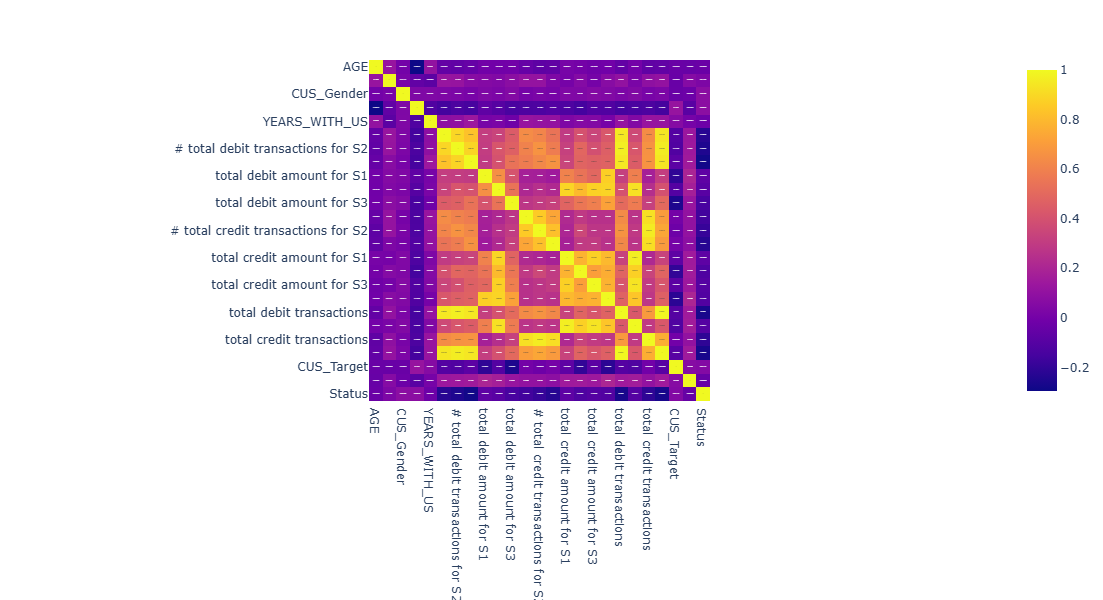

In [118]:
fig=px.imshow(df.corr(),text_auto=True, width=800,height=600)
fig

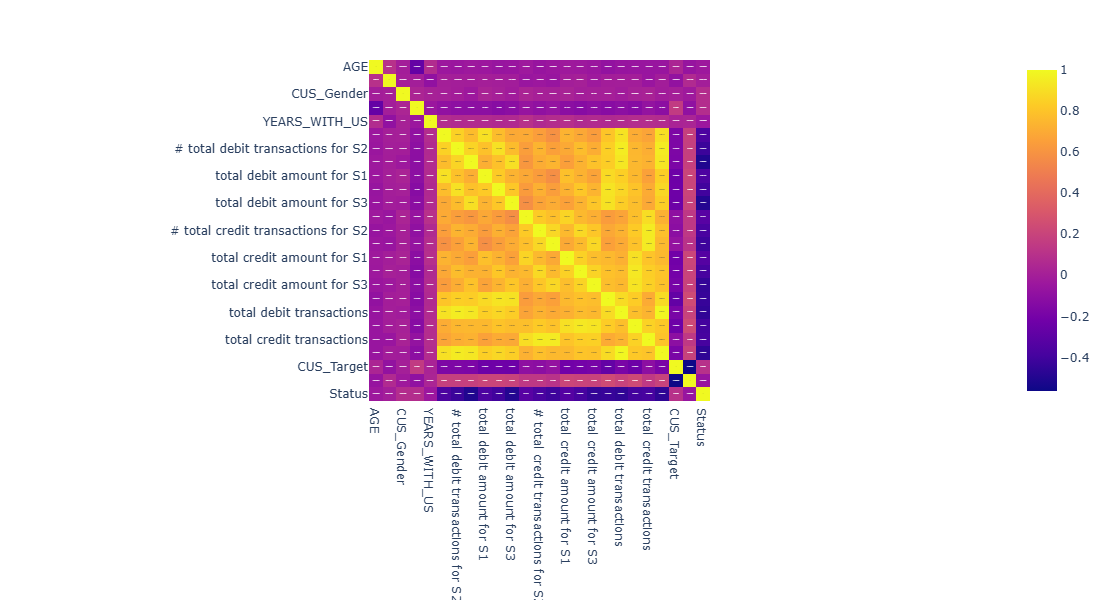

In [120]:
fig=px.imshow(df.corr(method = 'spearman'),text_auto=True, width=800,height=600)
fig

Frequency Distribution of 'Customer status': Status
0    1015
1     223
Name: count, dtype: int64
Status
0    1015
1     223
Name: count, dtype: int64


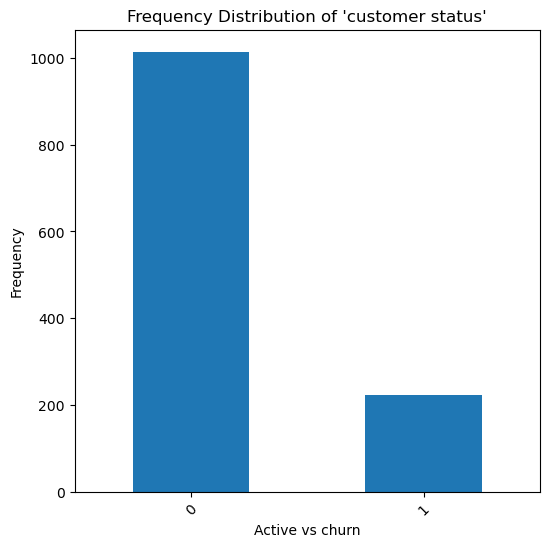

In [122]:
# Calculate frequency distribu
frequency_distribution = df['Status'].value_counts()   #to estimate frequency distribution
print("Frequency Distribution of 'Customer status':",frequency_distribution)
print(frequency_distribution)


# Plot the frequency distribution
plt.figure(figsize=(6,6))
frequency_distribution.plot(kind='bar')
plt.title("Frequency Distribution of 'customer status'")
plt.xlabel("Active vs churn")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [124]:
# Feature Selection and Scaling
x = df.drop(columns=['Status'])  
y = df['Status']

In [126]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [128]:
# Scale the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [130]:
# Model Training
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [132]:
# Predictions and Evaluation
y_pred1 = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred1))

print("Classification Report:")
print(classification_report(y_test, y_pred1))

Accuracy: 0.8588709677419355
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       208
           1       0.58      0.45      0.51        40

    accuracy                           0.86       248
   macro avg       0.74      0.69      0.71       248
weighted avg       0.85      0.86      0.85       248



In [134]:
from sklearn.linear_model import LogisticRegression

In [136]:
log = LogisticRegression()

In [138]:
log.fit(x_train,y_train)

LogisticRegression()

In [140]:
y_pred2 = log.predict(x_test)

In [142]:
accuracy_score(y_test,y_pred2)

0.8508064516129032

In [144]:
y_pred2 = log.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred2))

print("Classification Report:")
print(classification_report(y_test, y_pred2))

Accuracy: 0.8508064516129032
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       208
           1       0.56      0.38      0.45        40

    accuracy                           0.85       248
   macro avg       0.72      0.66      0.68       248
weighted avg       0.83      0.85      0.84       248



In [146]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train,y_train)

SVC()

In [148]:
y_pred3 = svm.predict(x_test)

In [150]:
accuracy_score(y_test,y_pred3)

0.8387096774193549

In [152]:
y_pred3 = svm.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred3))

print("Classification Report:")
print(classification_report(y_test, y_pred3))

Accuracy: 0.8387096774193549
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       208
           1       0.00      0.00      0.00        40

    accuracy                           0.84       248
   macro avg       0.42      0.50      0.46       248
weighted avg       0.70      0.84      0.77       248



C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [154]:
from sklearn.neighbors import KNeighborsClassifier

In [156]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [158]:
y_pred4 = knn.predict(x_test)

C:\Users\pc\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:150: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "C:\Users\pc\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 227, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\pc\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pc\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\pc\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
       

In [159]:
accuracy_score(y_test,y_pred4)

0.8266129032258065

In [162]:
y_pred4 = knn.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred4))

print("Classification Report:")
print(classification_report(y_test, y_pred4))

Accuracy: 0.8266129032258065
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       208
           1       0.46      0.42      0.44        40

    accuracy                           0.83       248
   macro avg       0.68      0.66      0.67       248
weighted avg       0.82      0.83      0.82       248



In [164]:
from sklearn.tree import DecisionTreeClassifier

In [166]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [168]:
y_pred5 = dt.predict(x_test)

In [170]:
accuracy_score(y_test,y_pred5)

0.8185483870967742

In [172]:
y_pred5 = dt.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred5))

print("Classification Report:")
print(classification_report(y_test, y_pred5))

Accuracy: 0.8185483870967742
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       208
           1       0.45      0.60      0.52        40

    accuracy                           0.82       248
   macro avg       0.69      0.73      0.70       248
weighted avg       0.84      0.82      0.83       248



In [174]:
from sklearn.ensemble import GradientBoostingClassifier

In [176]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [177]:
y_pred6 = gbc.predict(x_test)

In [178]:
accuracy_score(y_test,y_pred6)

0.8508064516129032

In [179]:
y_pred6 = gbc.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred6))

print("Classification Report:")
print(classification_report(y_test, y_pred6))

Accuracy: 0.8508064516129032
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       208
           1       0.55      0.42      0.48        40

    accuracy                           0.85       248
   macro avg       0.72      0.68      0.70       248
weighted avg       0.84      0.85      0.84       248



In [184]:
#to create new dataframe for final output
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                        'ACC':[accuracy_score(y_test,y_pred1),
                              accuracy_score(y_test,y_pred2),
                              accuracy_score(y_test,y_pred3),
                              accuracy_score(y_test,y_pred4),
                              accuracy_score(y_test,y_pred5),
                              accuracy_score(y_test,y_pred6)]})

In [186]:
final_data  #this is final accuracy of all algorithm

,Models,ACC
0,LR,0.858871
1,SVC,0.850806
2,KNN,0.838710
3,DT,0.826613
4,RF,0.818548
5,GBC,0.850806


In [188]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                        'Classification Report':[classification_report(y_test, y_pred1),
                              classification_report(y_test, y_pred2),
                              classification_report(y_test, y_pred3),
                              classification_report(y_test, y_pred4),
                              classification_report(y_test, y_pred5),
                              classification_report(y_test, y_pred6)]} ,axis=1)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



TypeError: DataFrame.__init__() got an unexpected keyword argument 'axis'

In [ ]:
final_data

# save model

In [192]:
import joblib
joblib.dump(log,'churn_predict_model')
model = joblib.load('churn_predict_model')

In [194]:
df.columns

Index(['AGE', 'CUS_Month_Income', 'CUS_Gender', 'CUS_Marital_Status',
       'YEARS_WITH_US', '# total debit transactions for S1',
       '# total debit transactions for S2',
       '# total debit transactions for S3', 'total debit amount for S1',
       'total debit amount for S2', 'total debit amount for S3',
       '# total credit transactions for S1',
       '# total credit transactions for S2',
       '# total credit transactions for S3', 'total credit amount for S1',
       'total credit amount for S2', 'total credit amount for S3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'CUS_Target',
       'TAR_Desc', 'Status'],
      dtype='object')

# model prediction is churn or active

In [197]:
model.predict([[16,200000,0,4,14,3,0,0,8693.6,0,0,0,0,0,0,0,0,8693.6,3,0,0,3,2223,1]])

if (prediction[0]==0):
    print("the customer is Active")
else:
    print("the customer is Churn ")

NameError: name 'prediction' is not defined

In [199]:


input_data=(16,200000,0,4,14,3,0,0,8693.6,0,0,0,0,0,0,0,0,8693.6,3,0,0,3,2223,1)
#chanching the input data into numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape predicting array as we are predicting for one instatnce
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)

prediction=log.predict(input_data_reshape)
print(prediction)

if (prediction[0]==0):
    print("the customer is Active")
else:
    print("the customer is Churn")

[1]
the customer is Churn


In [201]:
df.head(10)

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,49,7116.64,1,1,25,277,265,345,1459126.64,1230543.08,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,0,0
1,46,1500000.00,0,4,14,37,15,45,35372.55,20134.00,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,1,0
2,53,5000000.00,0,4,14,31,14,8,28248.85,4777.66,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,2,0
3,15,500.00,0,4,14,0,1,0,0.00,4000.00,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,1,0
4,48,9000000.00,0,4,5,15,33,12,69083.38,223007.51,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,1,0
5,37,2556.00,1,4,14,113,138,239,735123.61,538514.00,...,539970.27,739082.52,1883962.89,490,2037638.47,95,585,2235,2,0
6,16,200000.00,0,4,14,3,0,0,8693.60,0.00,...,0.00,0.00,8693.60,3,0.00,0,3,2223,1,1
7,39,10000000.00,1,1,14,128,150,144,596180.91,477478.63,...,492067.05,630958.47,1477803.14,422,1554678.53,32,454,2223,1,0
8,46,15000000.00,1,1,14,214,362,301,772877.13,1461364.36,...,1296021.03,1043510.33,3240369.08,877,3160483.36,49,926,2212,0,0
9,59,1500000.00,0,1,14,11,40,79,43400.00,128076.13,...,130000.00,398046.93,535684.68,130,528046.93,12,142,2223,1,0


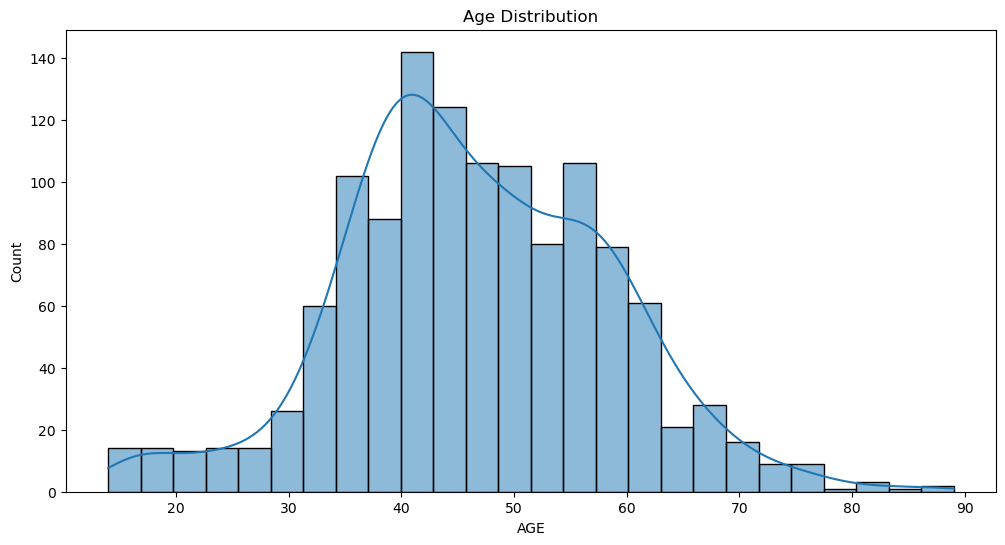

In [203]:
# Plotting distributions
plt.figure(figsize=(12, 6))
sns.histplot(df['AGE'], kde=True)
plt.title('Age Distribution')
plt.show()

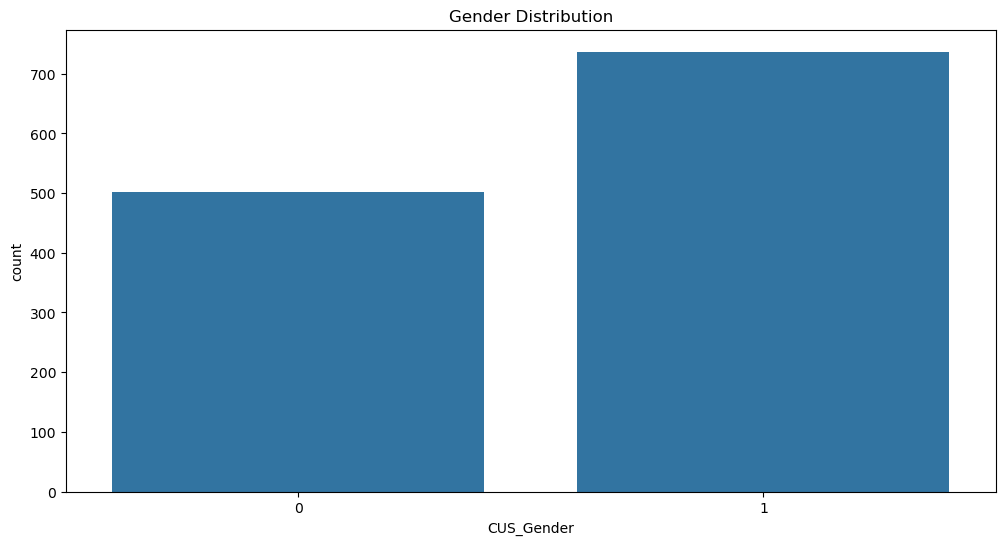

In [204]:
plt.figure(figsize=(12, 6))
sns.countplot(x='CUS_Gender', data=df)
plt.title('Gender Distribution')
plt.show()

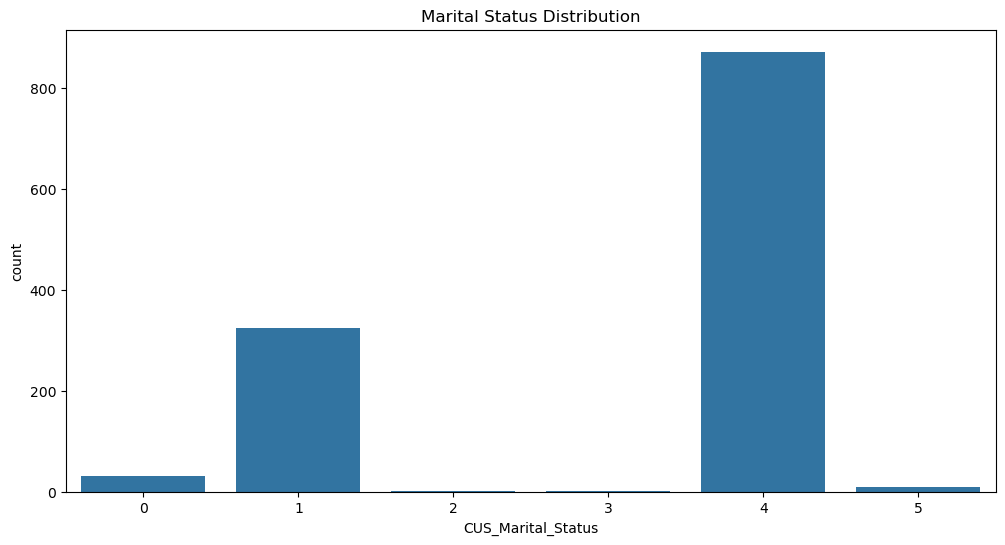

In [207]:
plt.figure(figsize=(12, 6))
sns.countplot(x='CUS_Marital_Status', data=df)
plt.title('Marital Status Distribution')
plt.show()

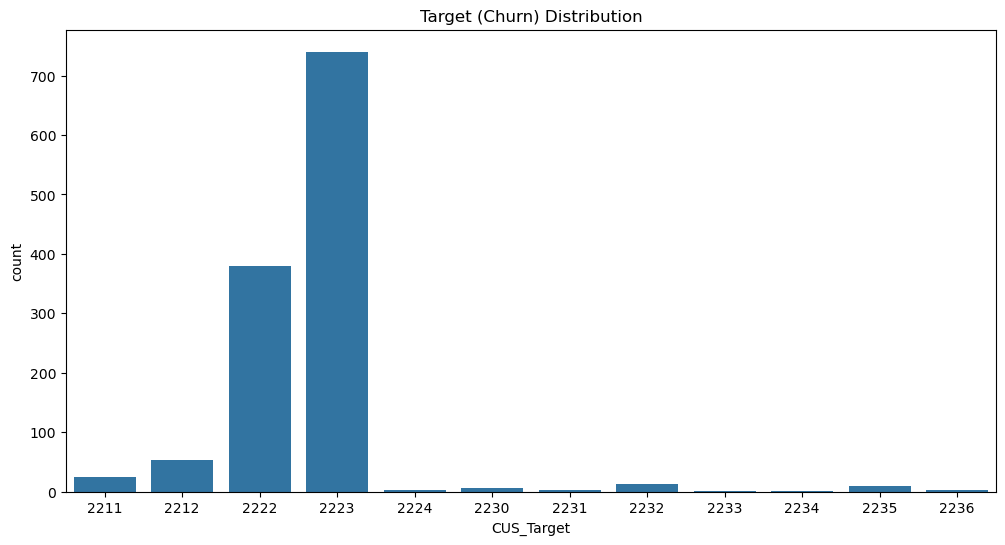

In [209]:
plt.figure(figsize=(12, 6))
sns.countplot(x='CUS_Target', data=df)
plt.title('Target (Churn) Distribution')
plt.show()

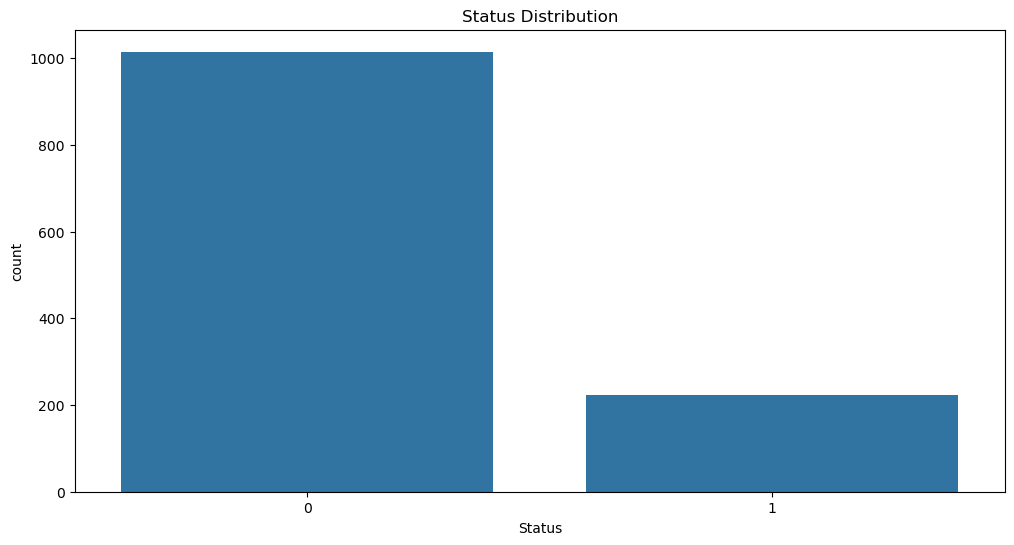

In [210]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Status', data=df)
plt.title('Status Distribution')
plt.show()

0======"Active customer"
1======"churn customer"